In [246]:
import pandas as pd


In [247]:
observations_df = pd.read_csv("./round-4-island-data-bottle/observations_round_4_day_1.csv")
prices_df = pd.read_csv("./round-4-island-data-bottle/prices_round_4_day_1.csv", sep=';')

observations_df.head(), prices_df.head()

(   timestamp  bidPrice  askPrice  transportFees  exportTariff  importTariff  \
 0          0     627.0     628.5            1.0           9.0          -3.0   
 1        100     630.0     631.5            1.0           9.0          -3.0   
 2        200     630.0     631.5            1.0           9.0          -3.0   
 3        300     632.0     633.5            1.0           9.0          -3.0   
 4        400     630.5     632.0            1.0           9.0          -3.0   
 
    sugarPrice  sunlightIndex  
 0  200.000000          60.00  
 1  200.098445          60.00  
 2  200.103915          60.00  
 3  200.352462          60.01  
 4  200.201545          60.01  ,
    day  timestamp                     product  bid_price_1  bid_volume_1  \
 0    1          0               VOLCANIC_ROCK      10515.0         143.0   
 1    1          0              PICNIC_BASKET1      58705.0          12.0   
 2    1          0              PICNIC_BASKET2      30252.0          12.0   
 3    1          

In [248]:
# Clean prices_df to only contain macaron info
macaron_prices_df = prices_df[prices_df['product'] == 'MAGNIFICENT_MACARONS']
macaron_prices_df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
6,1,0,MAGNIFICENT_MACARONS,624.0,20.0,622.0,12.0,617.0,23.0,631,10,639.0,23.0,644.0,12.0,627.5,0.0
29,1,100,MAGNIFICENT_MACARONS,627.0,14.0,625.0,12.0,620.0,21.0,634,7,642.0,21.0,647.0,12.0,630.5,0.0
41,1,200,MAGNIFICENT_MACARONS,627.0,10.0,625.0,15.0,620.0,21.0,634,5,642.0,21.0,647.0,15.0,630.5,0.0
47,1,300,MAGNIFICENT_MACARONS,629.0,14.0,627.0,14.0,622.0,26.0,636,7,644.0,26.0,649.0,14.0,632.5,0.0
73,1,400,MAGNIFICENT_MACARONS,628.0,18.0,625.0,16.0,620.0,26.0,635,9,643.0,26.0,648.0,16.0,631.5,0.0


In [249]:

# make sure both are the same dtype
macaron_prices_df['timestamp'] = macaron_prices_df['timestamp'].astype(int)
observations_df['timestamp']  = observations_df['timestamp'].astype(int)

# left‐merge on the column
df = pd.merge(
    macaron_prices_df,
    observations_df,
    on='timestamp',
    how='left'    # or 'inner' if you only want rows that appear in both
)

# now you have timestamp + all obs columns
df.head()


/var/folders/2l/smy92gh956l17wkm5_dsmlbr0000gn/T/ipykernel_95022/3623688975.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  macaron_prices_df['timestamp'] = macaron_prices_df['timestamp'].astype(int)


,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,...,ask_volume_3,mid_price,profit_and_loss,bidPrice,askPrice,transportFees,exportTariff,importTariff,sugarPrice,sunlightIndex
0,1,0,MAGNIFICENT_MACARONS,624.0,20.0,622.0,12.0,617.0,23.0,631,...,12.0,627.5,0.0,627.0,628.5,1.0,9.0,-3.0,200.000000,60.00
1,1,100,MAGNIFICENT_MACARONS,627.0,14.0,625.0,12.0,620.0,21.0,634,...,12.0,630.5,0.0,630.0,631.5,1.0,9.0,-3.0,200.098445,60.00
2,1,200,MAGNIFICENT_MACARONS,627.0,10.0,625.0,15.0,620.0,21.0,634,...,15.0,630.5,0.0,630.0,631.5,1.0,9.0,-3.0,200.103915,60.00
3,1,300,MAGNIFICENT_MACARONS,629.0,14.0,627.0,14.0,622.0,26.0,636,...,14.0,632.5,0.0,632.0,633.5,1.0,9.0,-3.0,200.352462,60.01
4,1,400,MAGNIFICENT_MACARONS,628.0,18.0,625.0,16.0,620.0,26.0,635,...,16.0,631.5,0.0,630.5,632.0,1.0,9.0,-3.0,200.201545,60.01


Features most positively correlated with mid_price:
sugarPrice       0.668464
timestamp        0.017357
transportFees    0.011269
exportTariff    -0.004017
importTariff    -0.364171
sunlightIndex   -0.701289
Name: mid_price, dtype: float64

Features most strongly (pos or neg) correlated with mid_price:
sunlightIndex    0.701289
sugarPrice       0.668464
importTariff     0.364171
timestamp        0.017357
transportFees    0.011269
exportTariff     0.004017
Name: mid_price, dtype: float64


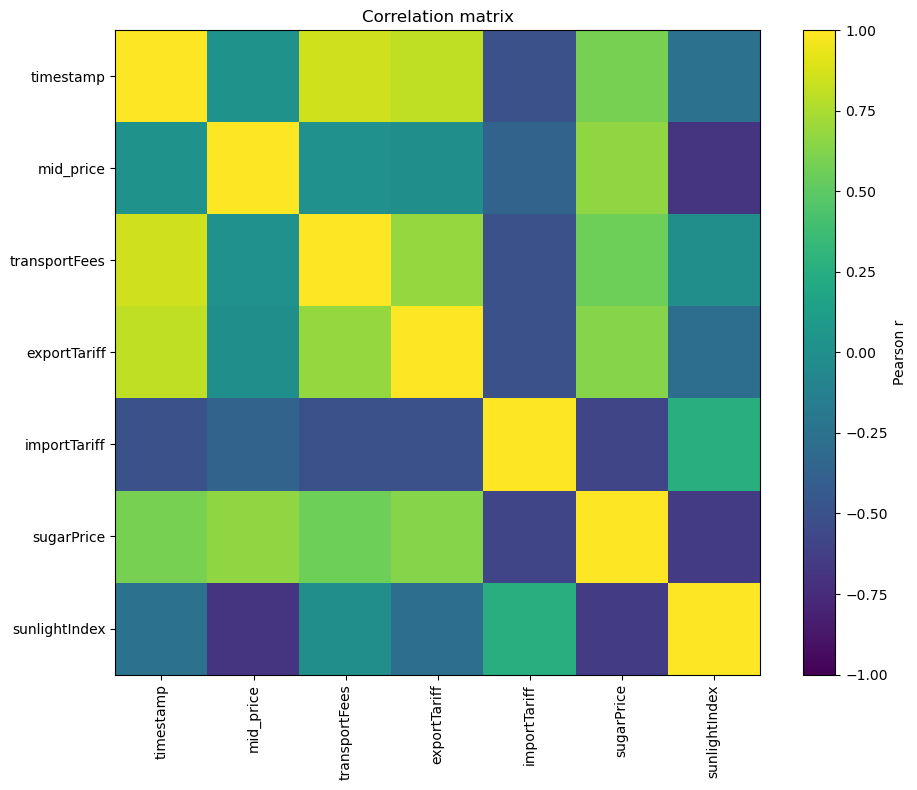

In [250]:
# Correlation Matrix
import matplotlib.pyplot as plt

# 1. select numeric columns
exclude = [
    'ask_price_1','bid_price_1',
    'bid_price_2','bid_price_3',
    'ask_price_2','ask_price_3',
    'ask_volume_1','bid_volume_1',
    'ask_volume_2','bid_volume_2',
    'ask_volume_3','bid_volume_3',
    'day', 'profit_and_loss',
    'askPrice', 'bidPrice'
]

# select numbers and drop
num_df = df.select_dtypes(include='number').drop(columns=exclude)

# 2. full correlation matrix
corr_matrix = num_df.corr()

# 3a. get correlations with mid_price, sorted descending
corr_with_mid = corr_matrix['mid_price'].drop('mid_price') \
                                       .sort_values(ascending=False)
print("Features most positively correlated with mid_price:")
print(corr_with_mid)

# 3b. Or sort by absolute value to see both strong positive and negative
corr_abs = corr_with_mid.abs().sort_values(ascending=False)
print("\nFeatures most strongly (pos or neg) correlated with mid_price:")
print(corr_abs)

# (optional) visualize full matrix with matplotlib
plt.figure(figsize=(10,8))
plt.imshow(corr_matrix, vmin=-1, vmax=1)
plt.colorbar(label='Pearson r')
plt.xticks(range(len(corr_matrix)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix)), corr_matrix.index)
plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression

features = [
    'sugarPrice',
    'exportTariff',
    'transportFees',
    'importTariff',
    'sunlightIndex'
]

lr = LinearRegression()
lr.fit(df[features], df['mid_price'])

print("Intercept:", lr.intercept_)
print("Coefficients:")
for feat, coef in zip(features, lr.coef_):
    print(f"  {feat}: {coef:.4f}")


Intercept: -218.73839562650255
Coefficients:
  sugarPrice: 7.2485
  totalFees: -60.3890
  sunlightIndex: -1.6229


In [252]:
# compute R^2 on the same data you trained on
r2 = lr.score(df[features], df['mid_price'])
print(f"R^2: {r2:.4f}")


R^2: 0.8175


In [253]:
import statsmodels.api as sm

X = sm.add_constant(df[features])
y = df['mid_price']

ols = sm.OLS(y, X).fit()
print(ols.summary())


                            OLS Regression Results                            
Dep. Variable:              mid_price   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                 1.493e+04
Date:                Fri, 18 Apr 2025   Prob (F-statistic):               0.00
Time:                        04:12:17   Log-Likelihood:                -47640.
No. Observations:               10000   AIC:                         9.529e+04
Df Residuals:                    9996   BIC:                         9.532e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -218.7384     12.201    -17.927

In [254]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# exclude the constant
X_no_const = X.drop(columns='const')
vif = pd.DataFrame({
    'feature': X_no_const.columns,
    'VIF': [variance_inflation_factor(X_no_const.values, i)
            for i in range(X_no_const.shape[1])]
})
print(vif)


         feature         VIF
0     sugarPrice  243.574449
1      totalFees  248.434538
2  sunlightIndex   18.475146


# Future predictions

In [255]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# 1. build X and y
X = df[features].copy()
y = df['mid_price'].shift(-1)    # tomorrow’s price

# 2. drop the last row (where y is NaN)
X, y = X.iloc[:-1], y.iloc[:-1]

# 3. fit & score
lr = LinearRegression().fit(X, y)
print("One‑step R²:", lr.score(X, y))

# 4. inspect coefficients
for f, c in zip(features, lr.coef_):
    print(f"{f:15s}: {c:.4f}")


One‑step R²: 0.8170995002687449
sugarPrice     : 7.2388
totalFees      : -60.3945
sunlightIndex  : -1.6273


In [256]:
import pandas as pd

def lag_corr(feat, max_lag=10):
    out = {}
    for lag in range(1, max_lag+1):
        c = df[feat].corr(df['mid_price'].shift(-lag))
        out[lag] = c
    return pd.Series(out)

for feat in features:
    print(f"\n{feat}:")
    print(lag_corr(feat, max_lag=5))



sugarPrice:
1    0.667869
2    0.667263
3    0.666655
4    0.666061
5    0.665460
dtype: float64

totalFees:
1   -0.164916
2   -0.165367
3   -0.165821
4   -0.166266
5   -0.166726
dtype: float64

sunlightIndex:
1   -0.701305
2   -0.701322
3   -0.701337
4   -0.701353
5   -0.701366
dtype: float64


In [ ]:
from statsmodels.tsa.stattools import grangercausalitytests

# prepare a 2‑col DataFrame and drop any NaNs
data = df[['mid_price'] + features].dropna()

for feat in features:
    print(f"\nGranger test: does {feat} → mid_price?")
    # maxlag=3 is just an example
    res = grangercausalitytests(data[['mid_price', feat]], maxlag=3, verbose=False)
    # print the p‑value from the 2nd lag’s F‑test:
    pval = res[2][0]['ssr_ftest'][1]
    print(f"  lag 2 p‑value = {pval:.4f}")
